# League of Legends Project - Exploratory Analysis
-  The goal of this project is to show my relevant data science skills using match data from the video game LoL (League of Legends).

-  This first notebook will be focused on data cleaning, exploration, visualisation and analysis.

-  Future notebooks will use this dataset to to create an elo system, and tune machine learning algorithms, to predict the result of games.

### The Aim of This Notebook Is To:

    -  Accumulate the data from various files to create the dataset.
    -  Preprocess and clean the dataset.
    -  Extract meaningful insights from the data to guide real life decision.
    -  Understand the data in preparation for the creation of predictive models.

***
# Step 1: Import the Dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import percentileofscore

import seaborn as sns
import matplotlib.pyplot as plt

The dataset I will use is made up of 11 individual csv files.<br>
Each file contains data about professional LoL games.

In [2]:
import_dtypes ={
    "gameid": "category",
    "datacompleteness": "category",
    "url": "category",
    "league": "category",
    "year": "uint16",
    "split": "category",
    "playoffs": "uint8",
    "patch": "category",
    "participantid": "uint8",
    "side": "category",
    "position": "category",
    "playername": "category",
    "playerid": "category",
    "teamname": "category",
    "teamid": "category",
    "champion": "category",
    "ban1": "category",
    "ban2": "category",
    "ban3": "category",
    "ban4": "category",
    "ban5": "category",
    "pick1": "category",
    "pick2": "category",
    "pick3": "category",
    "pick4": "category",
    "pick5": "category",
    "gamelength": "uint16",
    "result": "uint8",
    "kills": "uint8",
    "deaths": "uint8",
    "assists": "uint8",
    "teamkills": "uint8",
    "teamdeaths": "uint8"
}

In [3]:
years = range(14, 25)

for year in years:
    df_name = f"df{year}"
    globals()[df_name] = pd.read_csv(f"data/20{year}_LoL_esports_match_data_from_OraclesElixir.csv",
                                     dtype=import_dtypes,
                                     parse_dates=["date"])

In [4]:
dflol = pd.concat([globals()[f"df{year}"] for year in years], axis=0).set_index("gameid")

# Checking that the new combined dataframe dflol has the same number of rows of the previous dataframes
np.sum(np.array([globals()[f"df{year}"].shape[0] for year in years])) == dflol.shape[0]

True

# Step 2: Inspecting and Exploring the Data
Understanding what the data is, what problems it might have and what its sampling bias is

In [5]:
dflol.head(13)

,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
gameid,,,,,,,,,,,,,,,,,,,,,
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,1,...,206.0,76.0,-512.0,-18.0,3.0,4.0,0.0,1.0,2.0,2.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,2,...,140.0,-888.0,351.0,-42.0,0.0,5.0,3.0,2.0,1.0,1.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,3,...,225.0,621.0,733.0,8.0,1.0,5.0,1.0,1.0,2.0,0.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,4,...,161.0,3265.0,1950.0,50.0,6.0,2.0,0.0,0.0,0.0,4.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,5,...,28.0,1780.0,2397.0,-19.0,0.0,7.0,0.0,0.0,1.0,3.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,6,...,188.0,-76.0,512.0,18.0,1.0,2.0,2.0,3.0,4.0,0.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,7,...,98.0,888.0,-351.0,42.0,2.0,1.0,1.0,0.0,5.0,3.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,8,...,233.0,-621.0,-733.0,-8.0,1.0,2.0,0.0,1.0,5.0,1.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,9,...,211.0,-3265.0,-1950.0,-50.0,0.0,0.0,4.0,6.0,2.0,0.0


The game is about 2 teams, each of 5 players, who attempt to destroy the other team's base.  In order to do this they fight and kill the enemy players, kill minions and gather gold in order to overpower the enemy, destroy their towers, break into their base, and destroy it.

Each game takes up 12 rows.  10 rows for the players (1 each), and 1 for each team.

In the "participantid" column, the players are numbered from 1 to 10, the players 1-5 are on the blue side team and 6-10 on the red side team.  The 2 teams have participant ids of 100 for the blue side team and 200 for the red side team.

Some columns, like "dragons" (an enemy that both teams can kill, which gives rewards upon its death) are only filled in for the team rows and are left as NaN for the player rows.
Some columns, like "champion" (the character that each player chooses at the start of the game) are only filled in for the player rows and are left as NaN for the team rows.

***
A visual inspection of the data reveals that 3 of the columns contain missing data that is not being categorised as NaN but as 0.0 instead.

I know this because of my knowledge of the game.  Champions fight each other throughout the game and every time a champion is attacked, they mitigate some damage.  Therefore, "damagemitigatedperminute" should never be 0.0.

Vision score and vspm (vision score per minute) should also never be 0.  (These stats are increased when players place and destroy wards, trinkets that allow their team to see parts of the map).

In [6]:
print("Number of instances where 'vspm' is 0.0:", dflol.loc[dflol["vspm"] == 0.0, "wardsplaced"].shape[0])
print("Number of instances where 'vspm' is 0.0 but could actually be 0.0 rather than NaN:", dflol.loc[(dflol["vspm"] == 0.0)  & (dflol["wardsplaced"] == 0.0), "wardsplaced"].shape[0])

Number of instances where 'vspm' is 0.0: 100118
Number of instances where 'vspm' is 0.0 but could actually be 0.0 rather than NaN: 34


We can see based off of the wardsplaced and wardskilled columns that players should have a vision score but yet it is marked as 0.

I will convert all the 0.0 values to NaN values.

In [7]:
dflol.loc[:, ["damagemitigatedperminute", "visionscore", "vspm"]] = dflol.loc[:, ["damagemitigatedperminute", "visionscore", "vspm"]].replace(0.0, np.nan)

I will not engage in further data cleaning in this Notebook.  Because I want to maximise the available data for the Elo model and the ML models, I will do the data cleaning for both models in the preprocessing stage of both subsequent Notebooks.

In [8]:
# Storing the data in a pickle file for easy access in future notebooks.
dflol.to_pickle("dflol.pkl")

In [9]:
dflol["participantid"].value_counts()

participantid
1      83072
2      83072
3      83072
4      83072
5      83072
6      83072
7      83072
8      83072
9      83072
10     83072
100    83072
200    83072
Name: count, dtype: int64

Each position is represented an equal amount of times. 82,957 games are recorded in the data

In [10]:
dflol.loc[dflol["datacompleteness"] == "error", "league"].value_counts()

Series([], Name: count, dtype: int64)

If we look at the "datacompleteness" column, those rows which are labeled as "error" have a variety of missing statistics.  Unfortunately, only 504 columns are marked as this and most rows with missing statistics are not marked as "error".

However, we can note that the games here are from low quality leagues.

I found that missing data is generally from lower-quality leagues, or older games, rather than newer games that are higher quality.

Because I plan to use the dataset to predict high-quality professional games in the future, missing data that is 9 or 10 years old, or from lower quality leagues isn't a major problem.

Whilst there are millions of LoL games played daily, I am only using data from professional matches.  Whilst this provides a much smaller sample size than I would like, there are large differences between professional sanctioned matches and informal casual ones and so in order to predict professional games, I will exclusively use them in my data.

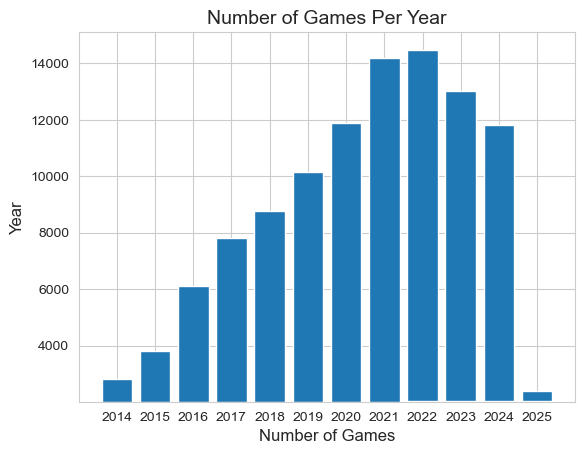

In [11]:
games_per_year = (dflol["year"].value_counts()/12).reset_index().sort_values(by="year")
years = np.array(range(2014,2026))
plt.bar(years, games_per_year["count"], bottom=years)

plt.xticks(range(2014, 2026))

plt.title("Number of Games Per Year", fontsize=14)
plt.xlabel("Number of Games", fontsize=12)
plt.ylabel("Year", fontsize=12)

plt.show()

In [12]:
df14["league"].value_counts()/12

league
NA LCS    336.0
EU LCS    325.0
NA CS      92.0
EU CS      87.0
WLDs       78.0
Name: count, dtype: float64

The fewer amount of games recorded in early years is partially due to fewer leagues being recorded.  In 2014, only 5 leagues are included but many more too place.

In [13]:
df24["league"].value_counts()/12

league
LPL                717.0
LDL                565.0
LCKC               511.0
NACL               488.0
LCK                482.0
EM                 399.0
PCS                297.0
LEC                294.0
ESLOL              291.0
LAS                289.0
CBLOLA             276.0
CBLOL              263.0
VCS                252.0
LVP SL             242.0
PRM                241.0
LFL                237.0
LLA                213.0
NLC                208.0
LCS                192.0
TCL                181.0
LFL2               172.0
NEXO               161.0
UL                 159.0
LCO                156.0
HM                 155.0
LPLOL              154.0
GLL                153.0
AL                 153.0
EPL                150.0
LIT                149.0
LJL                148.0
EBL                142.0
PRMP               134.0
WLDs               132.0
HC                 111.0
TSC                107.0
LRS                102.0
LRN                 91.0
HW                  84.0
MSI               

51 leagues are recorded in 2024.

Many of these leagues did not exist in 2014, like the "ESLOL", the Belgian League, but many, like the Chinese "LPL" did exist but were  not recorded in the 2014 data.


In [14]:
df15["league"].value_counts()/12

league
OGN       394.0
NA LCS    247.0
EU LCS    247.0
LMS       183.0
TCL       168.0
NA CS     135.0
EU CS     133.0
WLDs       73.0
OPL        52.0
IEM        47.0
KeSPA      34.0
CBLOL      30.0
MSI        28.0
LCS        14.0
TPL        12.0
LEC        11.0
LCK         8.0
Name: count, dtype: float64

If we look at the data from 2015, we can see that the "league" column includes some wrong data.  It includes the "LEC" league, which at this time, didn't exist.

In [15]:
df15[df15["league"] == "LEC"]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
18972,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,158.0,658.0,870.0,31.0,2.0,0.0,1.0,0.0,3.0,2.0
18973,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,80.0,-829.0,22.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0
18974,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,269.0,-1243.0,-1310.0,-26.0,0.0,0.0,1.0,2.0,0.0,0.0
18975,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,219.0,-920.0,-94.0,-17.0,0.0,1.0,1.0,2.0,0.0,0.0
18976,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,30.0,-1091.0,-165.0,-8.0,0.0,1.0,2.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,237.0,-477.0,-218.0,-14.0,0.0,3.0,2.0,2.0,4.0,0.0
19220,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,215.0,-66.0,-464.0,32.0,1.0,1.0,1.0,0.0,2.0,0.0
19221,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,20.0,878.0,-292.0,-7.0,1.0,3.0,1.0,0.0,3.0,4.0
19222,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,757.0,-893.0,214.0,-66.0,7.0,14.0,7.0,7.0,9.0,7.0


We can have a closer look at the games, and they are part of the "EU LCS regional qualifier" tournament.  This has been wrongly labelled as part of the LEC.

There are hundreds of leagues and many that I am not familiar with and so I won('t manually verify and change every game in the "league" column.  It will remain an approximate feature.

# Step 3: Data Analysis
Exploring and analysing the data

### Analysis of the Different Positions

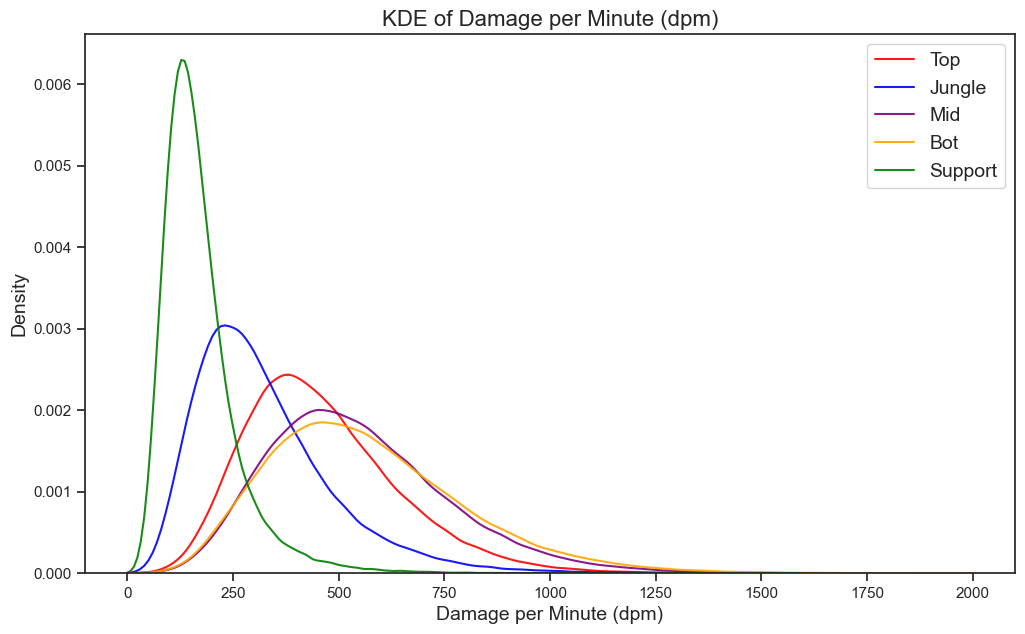

In [16]:
colours = ["red", "blue", "purple", "orange", "green"]
positions = ["top", "jng", "mid", "bot", "sup"]
position_names = ["Top", "Jungle", "Mid", "Bot", "Support"]

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(12,7))

for i in range(5):
    sns.kdeplot(dflol.loc[dflol["position"] == positions[i], "dpm"],
                color=colours[i],
                label=position_names[i],
                linewidth=1.5,
                alpha=0.9,
                clip=(0, 2000))

plt.title("KDE of Damage per Minute (dpm)", size=16)
plt.xlabel("Damage per Minute (dpm)", size=14)
plt.ylabel("Density", size=14)
plt.legend(fontsize=14)
plt.show()

To evaluate variations between the different positions we can look at "dpm" (damage per minute).

We can see that Support has, by far, the lowest damage, the smallest range and a pronounced mode.

Mid and Bot have the highest dpm with nearly identical modes, although Bot has a larger range.

Top has the 3rd highest dpm but has less variation than Mid and Bot

Jungle has the 2nd lowest, and the 2nd sharpest, mode.

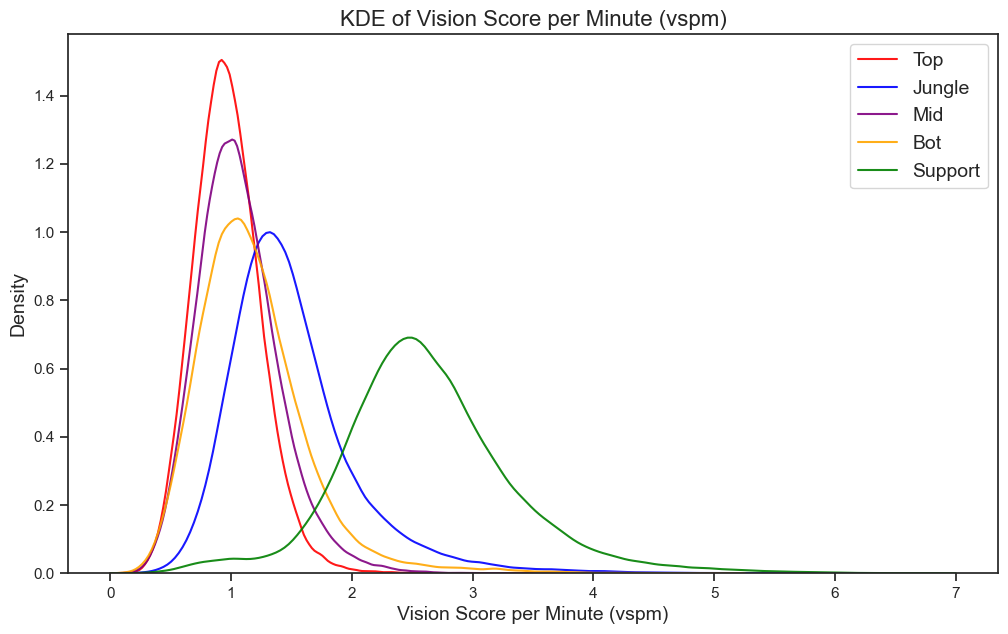

In [17]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(12,7))

for i in range(5):
    sns.kdeplot(dflol.loc[dflol["position"] == positions[i], "vspm"],
                color=colours[i],
                label=position_names[i],
                linewidth=1.5,
                alpha=0.9,
                clip=(0, 7))

plt.title("KDE of Vision Score per Minute (vspm)", size=16)
plt.xlabel("Vision Score per Minute (vspm)", size=14)
plt.ylabel("Density", size=14)
plt.legend(fontsize=14)
plt.show()

We can see that Support has by far and away the highest vspm (Vision Score per Minute) and clearly has the most variation.  Supports clearly don't deal as much damage but do get a lot of vision.

Jungle deal more damage than support and has the 2nd highest vspm.

Top, Mid and Bot, the three positions that focus on one part of the map (the top part, middle part, and bottom part) have the lowest mode vspm.

A quirk of the game is that the 2 roaming positions Jungle and Support spend more time on the bottom side of the map and so Bot has a larger variation with Top having the steepest density.

### Exploring "Patches" and Changes in The Game Over Time

In [18]:
dflol[dflol["position"] == "sup"].groupby("year")["vspm"].mean()

year
2014         NaN
2015         NaN
2016         NaN
2017    2.480986
2018    2.306845
2019    2.277233
2020    2.398127
2021    2.489318
2022    2.476150
2023    2.891007
2024    3.272511
2025    3.185425
Name: vspm, dtype: float64

We can see that vspm wasn't recorded until 2017 and so, in order to use it in our predictive model, we will have to discard 3 years worth of data

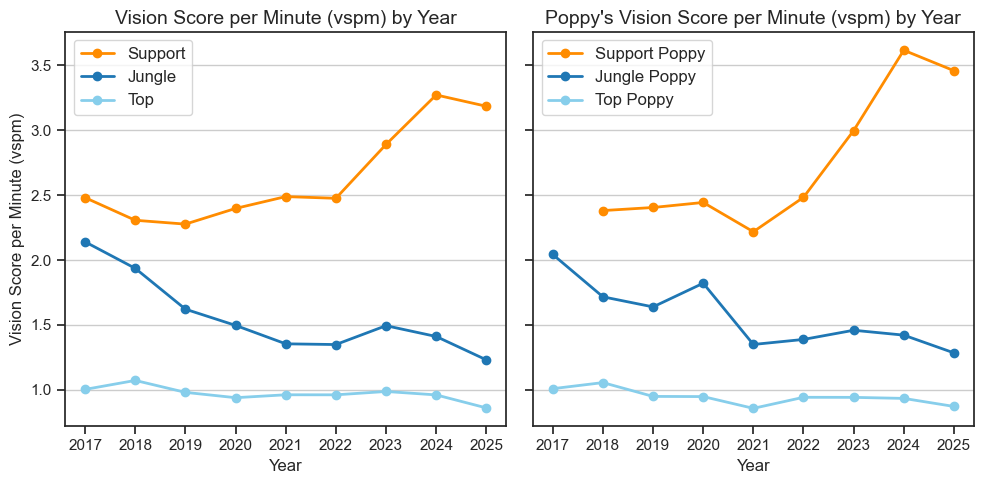

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axes[0].plot(dflol[dflol["position"] == "sup"].groupby("year")["vspm"].mean(),
             label="Support",
             marker="o",
             linestyle="-",
             linewidth=2,
             color="darkorange")

axes[0].plot(dflol[dflol["position"] == "jng"].groupby("year")["vspm"].mean(),
             label="Jungle",
             marker="o",
             linestyle="-",
             linewidth=2,
             color="tab:blue")

axes[0].plot(dflol[dflol["position"] == "top"].groupby("year")["vspm"].mean(),
             label="Top",
             marker="o",
             linestyle="-",
             linewidth=2,
             color="skyblue")

axes[0].grid(axis="y")
axes[0].set_title("Vision Score per Minute (vspm) by Year", size=14)
axes[0].set_xlabel("Year", size=12)
axes[0].set_ylabel("Vision Score per Minute (vspm)", size=12)
axes[0].legend(fontsize=12, loc=(0.02, 0.79))

axes[1].plot(dflol[(dflol["position"] == "sup") & (dflol["champion"] == "Poppy")].groupby("year")["vspm"].mean(),
             label="Support Poppy",
             marker="o",
             linestyle="-",
             linewidth=2,
             color="darkorange")

axes[1].plot(dflol[(dflol["position"] == "jng") & (dflol["champion"] == "Poppy")].groupby("year")["vspm"].mean(),
             label="Jungle Poppy",
             marker="o",
             linestyle="-",
             linewidth=2,
             color="tab:blue")

axes[1].plot(dflol[(dflol["position"] == "top") & (dflol["champion"] == "Poppy")].groupby("year")["vspm"].mean(),
             label="Top Poppy",
             marker="o",
             linestyle="-",
             linewidth=2,
             color="skyblue")

axes[1].grid(axis="y")
axes[1].set_title("Poppy's Vision Score per Minute (vspm) by Year", size=14)
axes[1].set_xlabel("Year", size=12)
axes[1].legend(fontsize=12, loc=(0.02, 0.79))

plt.tight_layout()
plt.show()

Another problem with the dataset spreading over a large number of years is that each position's role changes each year.

Since 2017 Jungle has become less focused on vision whilst Support has become more.

Every two weeks the game is updated with a "patch" which changes the game and with it the roles of the different positions.

There are large "patches" at the end of each year which cause drastic changes such as the increase in Support vspm between 2022 and 2023.

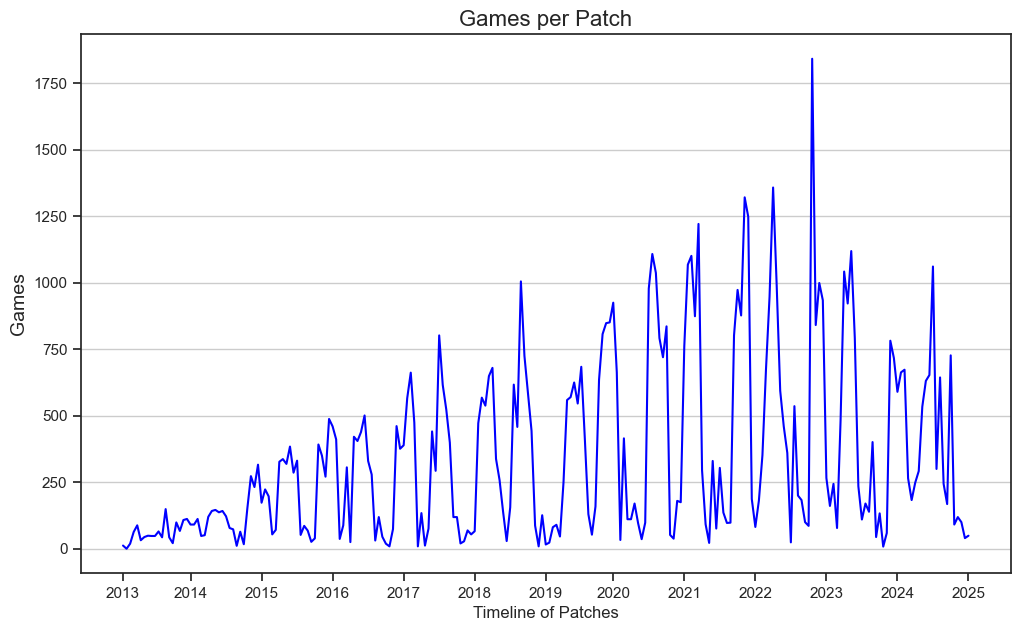

In [20]:
selections = ((((dflol["patch"].value_counts()
                 .reset_index()
                 .astype({"patch": "float32"}))
                .sort_values(by="patch"))
               .set_index("patch")))/12

patches_arr = dflol["patch"].astype("float32").unique()

plt.figure(figsize=(12,7))
plt.plot(patches_arr.astype("str"),selections.reindex(patches_arr, fill_value=0), color="blue")

tick_locations = patches_arr[np.linspace(0, len(patches_arr) - 1, 13, dtype=int)]
plt.xticks(ticks=tick_locations.astype("str"), labels=np.arange(2013,2026).astype("str"))
plt.grid(axis="y")

plt.title("Games per Patch", fontsize=16)
plt.ylabel("Games", fontsize=14)
plt.xlabel("Timeline of Patches")

plt.show()

There are large fluctuations.  These correlate to the "splits" where leagues will run for a couple of months, a split, and then take a break.

There are significant periods where very few matches are being played and there are rarely more than 1,000 games on a single patch.  This is too small a sample size to only use the patch that the game is on.

In [21]:
def champion_selections(champion):

    selections = (dflol[dflol["champion"] == champion].groupby("patch").size()
                        .reset_index()
                        .astype({"patch": "float32"})
                        .sort_values(by="patch")
                        .set_index("patch"))

    plt.figure(figsize=(12,7))
    plt.plot(patches_arr.astype("str"),selections.reindex(patches_arr, fill_value=0), color="purple")

    tick_locations = patches_arr[np.linspace(0, len(patches_arr) - 1, 13, dtype=int)]
    plt.xticks(ticks=tick_locations.astype("str"), labels=np.arange(2013,2026).astype("str"))
    plt.grid(axis="y")

    plt.title(f"Games per Patch for {champion}", fontsize=16)
    plt.ylabel("Games", fontsize=14)
    plt.xlabel("Timeline of Patches")

    plt.show()

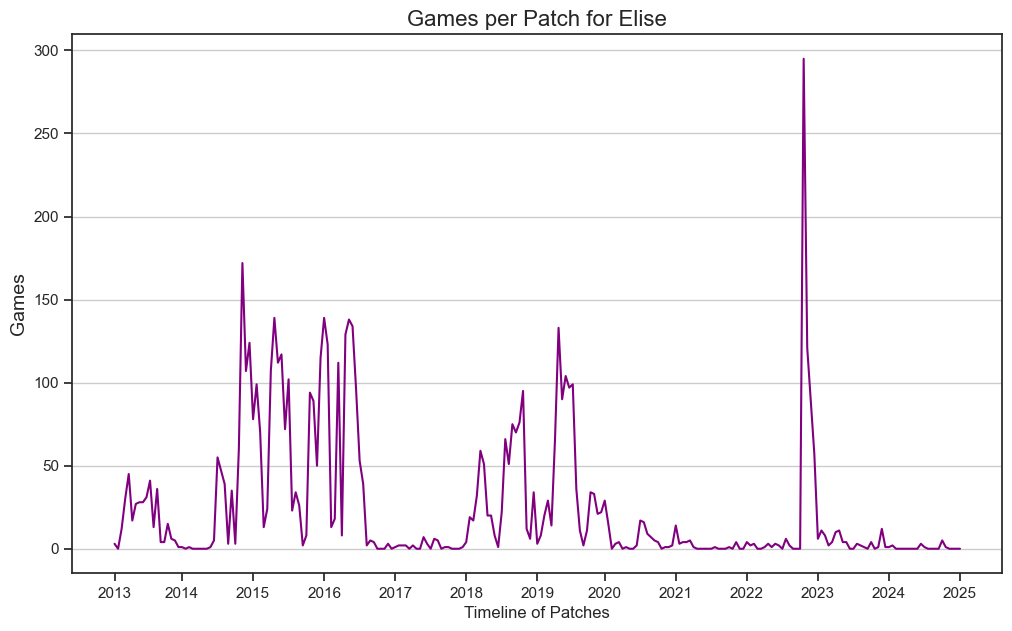

In [22]:
champion_selections("Elise")

Elise went through periods of being picked very often, 100+ times a patch followed by periods of obscurity.

We can also see a big spike in 2022 when she was "buffed" (her relative strength was increased in a patch) and then she was "nerfed" (her strength was decreased and she becoming weaker.

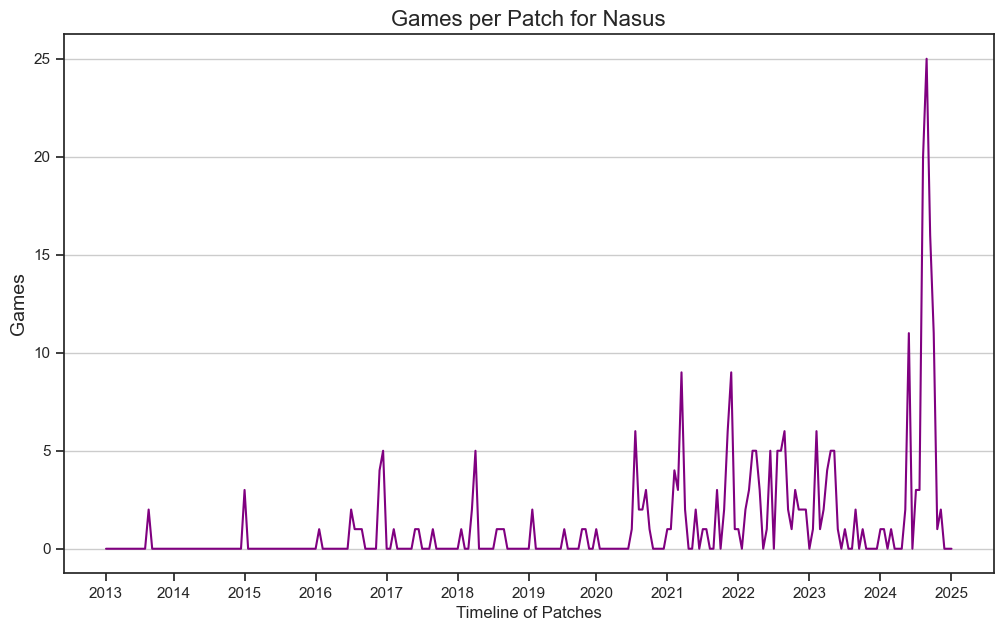

In [23]:
champion_selections("Nasus")

We can see that Nasus was rarely picked, having just a single period where he was picked more than 10 times per patch.

Following this he was nerfed and was not picked as often.

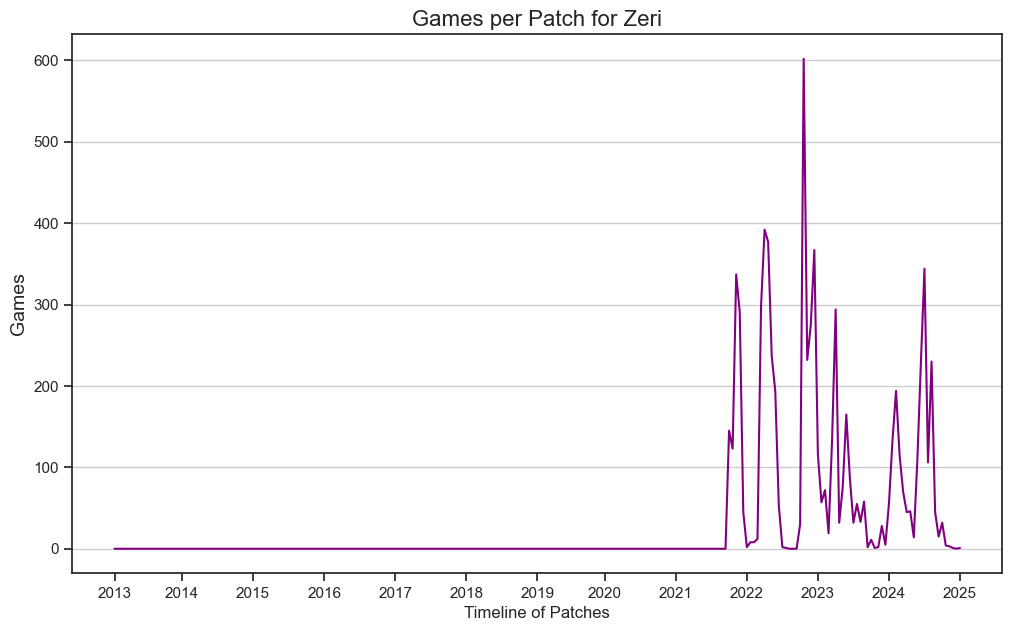

In [24]:
champion_selections("Zeri")

There are other champions that were only introduced after 2014 like Zeri.  We can see that she introduced in 2021 and has been picked regularly ever since.

### Exploring What Features Impact the Result

In [25]:
champs_more_than_200 = dflol["champion"].value_counts()
champs_more_than_200 = champs_more_than_200[champs_more_than_200 > 200].index # Only select champions that have been picked in more than 200 games

win_rate_champs = (dflol.loc[dflol["champion"].isin(champs_more_than_200), ["champion", "result"]]
                   .groupby("champion")["result"].mean()).rename("Win Rate")

win_rate_champs.nlargest(10)

champion
Twisted Fate    0.563041
Malzahar        0.554511
Skarner         0.553917
Bard            0.551378
Zed             0.544455
Rakan           0.541178
Maokai          0.536638
Aurelion Sol    0.536471
Talon           0.532787
Camille         0.531823
Name: Win Rate, dtype: float64

In [26]:
dflol["champion"].value_counts().nlargest(5)

champion
Nautilus    20773
Ezreal      16860
Braum       15065
Lee Sin     15058
Kai'Sa      14364
Name: count, dtype: int64

In [27]:
print(f"The champion, 'Nautilus', has been selected more times than any other champion and in {dflol['champion'].value_counts().loc['Nautilus']/(len(dflol)/12) * 100:.2f}% of total games.\n\nTeams that select him win {win_rate_champs.loc['Nautilus'] * 100:.2f}% of the time.")

The champion, 'Nautilus', has been selected more times than any other champion and in 25.01% of total games.

Teams that select him win 48.65% of the time.


In [28]:
win_rate_champs.nsmallest(10)

champion
Xerath       0.409574
Nasus        0.438163
Kayn         0.450331
Karma        0.452914
Lulu         0.453944
Bel'Veth     0.454733
Anivia       0.455056
Dr. Mundo    0.457688
Veigar       0.460648
Kog'Maw      0.461538
Name: Win Rate, dtype: float64

Different champions have different winrates when they are picked.

When a team picks "Twisted Fate" they win 56% of the time whereas a team picks Xerath they win just 41% of the time.

10 champions are picked each game, 1 champion is played by each player.

In [29]:
print(f"The Winrate of Champions has a low standard deviation, of {win_rate_champs.std()}, so individual champions do a poor job at explaining the result.")

The Winrate of Champions has a low standard deviation, of 0.022361993185549628, so individual champions do a poor job at explaining the result.


In [30]:
dflol.groupby("side")["result"].mean()

side
Blue    0.531996
Red     0.467498
Name: result, dtype: float64

In LoL, teams start on either the Blue side or the Red side of the map.  We can see that the team on Blue side has a slight advantage over the team on Red side.

***
In professional LoL there are many teams.  Some teams only play a few games before being disbanded and others play thousands.

The teams with the most games played are:

In [31]:
dflol["teamname"].value_counts().rename("Games Played").head(10)

teamname
KT Rolster             6480
Royal Never Give Up    6288
EDward Gaming          6102
DN Freecs              5436
Invictus Gaming        5424
Fnatic                 5406
Team WE                5370
Cloud9                 5316
Dplus KIA              5202
JD Gaming              5088
Name: Games Played, dtype: int64

In [32]:
print(f"There are {dflol['teamid'].nunique() - 1} unique teams.  (Not including 'unkonwn team')")
print(dflol['teamid'].nunique() - dflol["teamname"].nunique(), "teams share the same name as another team")

There are 1836 unique teams.  (Not including 'unkonwn team')
-269 teams share the same name as another team


In [33]:
teams_more_than_200 = dflol["teamid"].value_counts()

teams_more_than_200 = teams_more_than_200[teams_more_than_200 > 200].index

win_rate_teams = (dflol.loc[dflol["teamid"].isin(teams_more_than_200), ["teamid", "teamname", "result"]]
                  .groupby(["teamname", "teamid"])["result"].mean().rename("Win Rate"))

win_rate_teams.nlargest(10)

teamname             teamid                                 
Saprissa Esports     oe:team:1f75fda1d2b3b7aea236e4fd8a5dd4c    0.847059
Zeu5 Bogota          oe:team:c07f6511ffe83e745fd290a3dbe9a98    0.833333
Dragonsteel          oe:team:73062b9e7b567b8cd1f200e96efecc5    0.800000
Lyon Gaming          oe:team:d996d27c1737a1f7494fc09d6911339    0.795455
No Org               oe:team:4b85e66c4e276c54cb7f4428f030279    0.786885
Astralis SB          oe:team:90a3fe0ae48ef2bfe82b20711646096    0.773196
Cream Esports        oe:team:464ed025802ab9dbf7f78130613e252    0.767442
Awesome Spear        oe:team:fcfdb4e291df2ed5206d241f59fd902    0.756757
Wildcard Gaming Red  oe:team:e4c1b46cd564252c83c5102dc789b3b    0.754098
Cloud9 Challengers   oe:team:0a3b94b6b532be6a4fb62b5cc4f8a5f    0.750000
Name: Win Rate, dtype: float64

There are teams, with over 200 games played, that have win rates exceeding 80%. This is substantial increase in variability compared to the maximum win rate of 56% for champions.

In [34]:
win_rate_teams.nsmallest(10)

teamname                teamid                                 
SEM9                    oe:team:5e3055ed3b815352627fec92727dfe6    0.055556
Dewish Team             oe:team:f7c0f545d3fc1860239d04b3ebe97f8    0.100000
Qing Jiu E-sport Club   oe:team:ca3c8e270b623c1ed43ba1d912e23f4    0.101449
FLY FAM                 oe:team:426e3c3c1048f348d88cac6d146d370    0.131579
Hellions e-Sports Club  oe:team:4c4f442efee238e1448bc3ad5548a49    0.152174
Vandals Esports         oe:team:b62ca0a6c7279dc53fb2afa1946d284    0.184211
Fireball                oe:team:a8155b0ea02bae01cd41369018837d6    0.190476
Vikings Gaming          oe:team:5c1805e6ac1ed4744cb02abb0184f26    0.190476
Tectonic                oe:team:ee45aec8db48a3adec16589f944e577    0.192308
AXIZ Academy            oe:team:3b1c9e07a26cdc1ed8b830314e19cfd    0.194444
Name: Win Rate, dtype: float64

There are also teams, with over 200 games played, that have win rates below 20%.

Like with champions where the minimum win rate is 41% and the maximum is 56%, the minimum for teams, of 6%, is further away from the mean than the maximum win rate of 85%.

In [35]:
print("Standard Deviation of champions' win rates:", win_rate_champs.std())
print("Standard Deviation of teams' win rates:", win_rate_teams.std())

Standard Deviation of champions' win rates: 0.022361993185549628
Standard Deviation of teams' win rates: 0.11848325536060497


The teams, rather than individual champions, are better at explaining the variation in result of games.

## Statistics Recorded During the Game

We can look at the data that is collected at regular intervals within the game.  Our dataset includes various statistics recorded at 10, 15, 20, 25 minutes, as well as at the end of games.

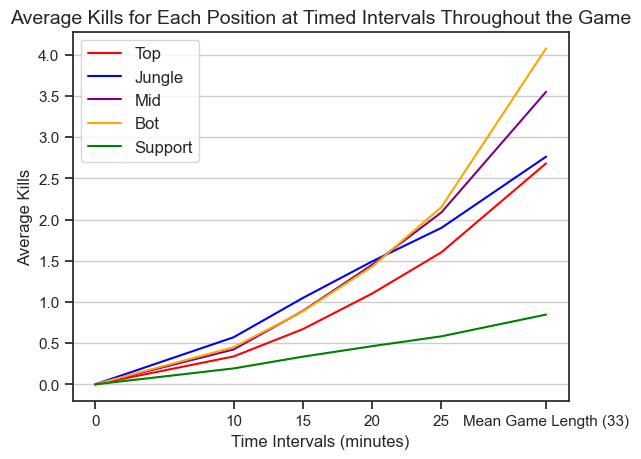

In [36]:
tick_locations = [0, 10, 15, 20, 25, dflol["gamelength"].mean()/60]
x_labels = ["0", "10", "15", "20", "25", f"Mean Game Length ({dflol['gamelength'].mean()/60:.0f})"]

for i in range(5):
    plt.plot(tick_locations, pd.concat([pd.Series([0], index=["killsat0"]),
                                        dflol.loc[dflol["position"] == positions[i],
                                        ["killsat10", "killsat15", "killsat20", "killsat25", "kills"]].mean()]),
             color=colours[i],
             label=position_names[i])

plt.xticks(tick_locations, labels=x_labels)
plt.grid(axis="y")

plt.title("Average Kills for Each Position at Timed Intervals Throughout the Game", fontsize=14)
plt.ylabel("Average Kills")
plt.xlabel("Time Intervals (minutes)")
plt.legend(fontsize=12)

plt.show()

We can also see the parabolic structure of the curve for the Top, Mid and Bot positions.  During the latter intervals there is a steeper curve indicating more kills per minute.

Junglers have the most kills at the 10 and 15 minute intervals but are overtaken by Bot and Mid by 25 minutes.

Support has the least kills by far at all points of the game.

In [37]:
# We can see, from looking at teamkills, that the winning team gets around 2x the kills of the losing team.
print(f"The losing team has an average of {dflol.groupby('result')['teamkills'].mean().loc[0]:.1f} kills per game\nWhereas the winning team has an average roughly double that of {dflol.groupby('result')['teamkills'].mean().loc[1]:.1f}")


The losing team has an average of 9.1 kills per game
Whereas the winning team has an average roughly double that of 18.8


Gold, in LoL, can spnt on a variety of items that increase the damage a player's champion can deal or decrease the damage they take.

Gold is earnt by killing enemy champions, towers, and minions.<br>Minions are non-player-characters and each team has their own minions.  They spawn every 45 seconds, walk across the map and attack the other team's minions and towers.  When the player kills the other team's minions the player receives gold.  The player can use their own team's minions to help destroy enemy towers.  Players cannot kill their own team's minions.

Killing minions takes up a large part of the game for Top, Mid, and Bot, who are expected to kill the minions in the top, middle, and bottom parts of the map.  Support does not generally kill minions whilst Jungle is expected to  kill "neutral monsters" which are located throughout the map.

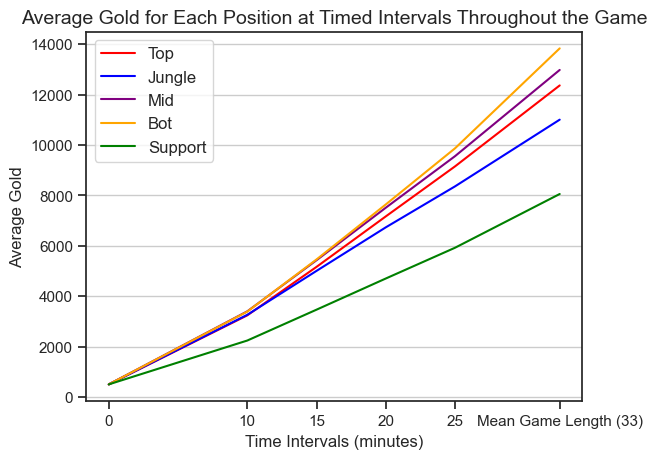

In [38]:
for i in range(5):
    plt.plot(tick_locations, pd.concat([pd.Series([500], index=["killsat0"]), # Players start with 500 gold
                                        dflol.loc[dflol["position"] == positions[i],
                                        ["goldat10", "goldat15", "goldat20", "goldat25", "totalgold"]].mean()]),
             color=colours[i],
             label=position_names[i])

plt.xticks(tick_locations, labels=x_labels)
plt.grid(axis="y")

plt.title("Average Gold for Each Position at Timed Intervals Throughout the Game", fontsize=14)
plt.ylabel("Average Gold")
plt.xlabel("Time Intervals (minutes)")
plt.legend(fontsize=12)

plt.show()

There is a more linear relationship between gold and time, although it is still somewhat parabolic.

As we can probably expect from the graphs of kills, throughout the game Bot and Mid have the most gold, with Bot having notably more gold after the 25 minute interval.

The major difference compared to the Average Kill graph above is that Jungle, at all intervals has roughly the same, or less gold than Top.  This is due to the neutral monsters, that Jungle kills, providing less gold than minions, which Top kills.

In [39]:
dflol["opp_kpm"] = dflol["ckpm"] - dflol["team kpm"] # Creating a derivative column for the opponent team's kills per minute (kpm)
dflol["kpm_diff"] = dflol["team kpm"] - dflol["opp_kpm"] # Creating a derivative column for the difference between both teams' kpm

team_kill_majority = dflol[dflol["kpm_diff"] > 0.].groupby("result").size()
print(f"Teams that have a majority of kills win games {team_kill_majority.iloc[1]/team_kill_majority.sum()*100:.2f}% of the time")

Teams that have a majority of kills win games 95.74% of the time


In [40]:
dflol["tower_diff"] = dflol["towers"] - dflol["opp_towers"] # Creating a derivative column for the difference between the number of towers both teams have destroyed

In [41]:
team_tower_majority = dflol[dflol["tower_diff"] > 0.].groupby("result").size()
print(f"Teams that have a majority of towers win games {team_tower_majority.iloc[1]/team_tower_majority.sum()*100:.2f}% of the time")

Teams that have a majority of towers win games 98.38% of the time


In [42]:
# We can also look at "towers" which seem to be more indicative of a team winning.  In order for a team to win they have to destroy at least 5 towers of the enemy team (of the 11 enemy towers total).
all_towers = dflol[dflol["towers"] == 11.0].groupby("result").size()
print(f"{(all_towers.sum() / (len(dflol) * 0.2)) * 100:.2f}% of all teams destroyed all 11 enemy towers.")

print(f"Of these {all_towers.sum()} teams, {all_towers.iloc[1]/all_towers.sum() * 100:.2f}% won the game")
# Only 0.7% of games where a team destroyed 11 towers did they lose.

9.64% of all teams destroyed all 11 enemy towers.
Of these 19215 teams, 99.34% won the game


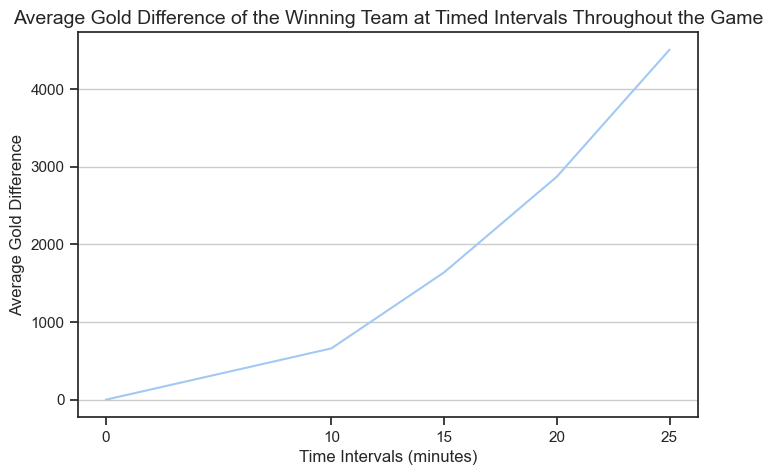

In [43]:
team_df = dflol[dflol["position"] == "team"]

tick_locations = [0, 10, 15, 20, 25]

plt.figure(figsize=(8,5))
plt.plot(tick_locations, pd.concat([pd.Series([0], index=["golddiffat0"]),
                                    team_df.loc[team_df["result"] == 1,["golddiffat10", "golddiffat15", "golddiffat20", "golddiffat25"]].mean()]))

plt.xticks(tick_locations, labels=tick_locations)
plt.grid(axis="y")

plt.title("Average Gold Difference of the Winning Team at Timed Intervals Throughout the Game", fontsize=14)
plt.ylabel("Average Gold Difference")
plt.xlabel("Time Intervals (minutes)")

plt.show()

We can see the parabolic nature of the graph just like we did for the indivudal positions' total gold.

This indicates that there may be an exponential relationship between gold difference of a team early in the game and gold difference later in the game.

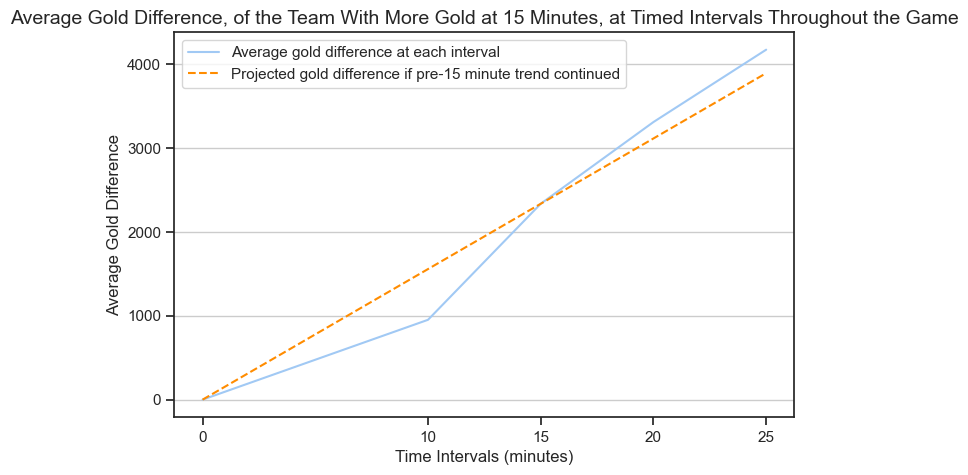

In [44]:
plt.figure(figsize=(8,5))
plt.plot(tick_locations, pd.concat([pd.Series([0], index=["golddiffat0"]),
                                    team_df.loc[team_df["golddiffat15"] > 0.,["golddiffat10", "golddiffat15", "golddiffat20", "golddiffat25"]].mean()]),
         label="Average gold difference at each interval")

plt.plot([0, 25], [team_df.loc[team_df["golddiffat15"] > 0.,"golddiffat15"].mean()/15 * xi for xi in [0, 25]],
         color="darkorange",
         linestyle="--",
         label="Projected gold difference if pre-15 minute trend continued")

plt.xticks(tick_locations, labels=tick_locations)
plt.grid(axis="y")

plt.title("Average Gold Difference, of the Team With More Gold at 15 Minutes, at Timed Intervals Throughout the Game", fontsize=14)
plt.ylabel("Average Gold Difference")
plt.xlabel("Time Intervals (minutes)")
plt.legend()

plt.show()

The above graph shows the average gold difference at 10, 15, 20, and 25 minute intervals for the team that had a positive gold difference at 15 minutes.
The Orange dotted line shows the projected linear progression of the team that had more gold at 15 minutes.  The trend does not appear to be exponential

We can also look at the same pattern for XP.

XP is acquired by teams in a similar way to gold.  (Rather by killing enemy champions, enemy towers, enemy minions, and neutral monsters, it is gained by being near enemies that die.)

XP improves each champion's raw statistics such as health and armour.  Like with gold, the more xp a player has, the "stronger" they are.

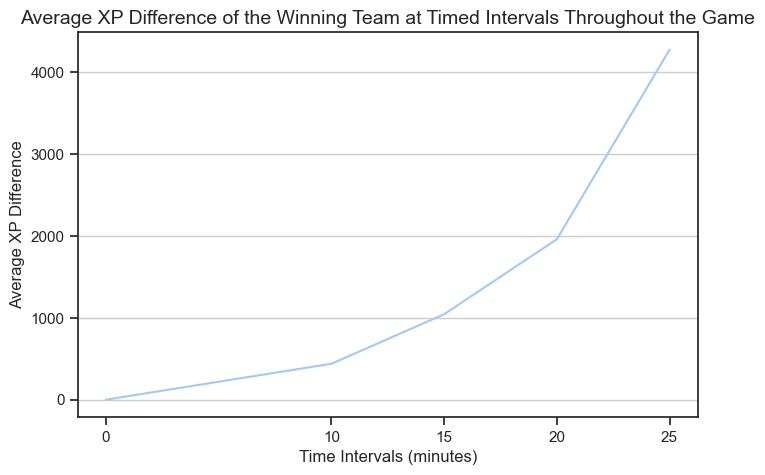

In [45]:
plt.figure(figsize=(8,5))
plt.plot(tick_locations, pd.concat([pd.Series([0], index=["xpdiffat0"]),
                                    team_df.loc[team_df["result"] == 1,["xpdiffat10", "xpdiffat15", "xpdiffat20", "xpdiffat25"]].mean()]))

plt.xticks(tick_locations, labels=tick_locations)
plt.grid(axis="y")

plt.title("Average XP Difference of the Winning Team at Timed Intervals Throughout the Game", fontsize=14)
plt.ylabel("Average XP Difference")
plt.xlabel("Time Intervals (minutes)")

plt.show()

We can see the parabolic nature of the XP difference graph of winning teams just like we saw for the gold difference of winning teams.

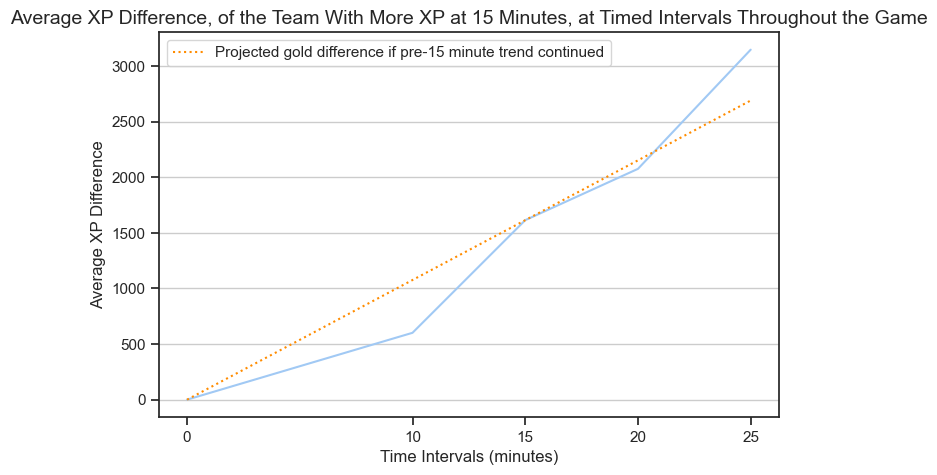

In [46]:
plt.figure(figsize=(8,5))

plt.plot(tick_locations, pd.concat([pd.Series([0], index=["xpdiffat0"]),
                                    team_df.loc[team_df["xpdiffat15"] > 0.,["xpdiffat10", "xpdiffat15", "xpdiffat20", "xpdiffat25"]].mean()]))

plt.plot([0, 25], [team_df.loc[team_df["xpdiffat15"] > 0.,"xpdiffat15"].mean()/15 * xi for xi in [0, 25]],
         color="darkorange",
         linestyle=":",
         label="Projected gold difference if pre-15 minute trend continued")

plt.xticks(tick_locations, labels=tick_locations)
plt.grid(axis="y")

plt.title("Average XP Difference, of the Team With More XP at 15 Minutes, at Timed Intervals Throughout the Game", fontsize=14)
plt.ylabel("Average XP Difference")
plt.xlabel("Time Intervals (minutes)")
plt.legend()

plt.show()

Like with gold, the exponential relationship of XP Difference does not appear as strong when we look at teams who had a positive XP difference at 15 minutes.

However, the relationship, unlike gold, does appear to be somewhat exponential.

# Step 4: Exploratory Logistic Regression

In order to better understand the most important features, I will quickly work with a basic logistic regression model and evaluate its rank of features.

Whilst this is not part of my actual predictive models that I will train in the LoL_Predictions notebook, it will provide insight into the data

### Cleaning the Data

In [47]:
team_df.isna().sum()/len(team_df) * 100

datacompleteness     0.000000
url                 34.397872
league               0.000000
year                 0.000000
split               21.598132
                      ...    
opp_assistsat25     17.760497
opp_deathsat25      17.760497
opp_kpm              0.000000
kpm_diff             0.000000
tower_diff           0.000000
Length: 163, dtype: float64

Removing columns that are not useful for logistic regression such as the "gamelength".

Removing columns where there is too much missing data such as "void_grubs"

Removing columns where the data is duplicated.  Because I plan to combine the row for the team on Blue side and the team on Red side for each game, statistics like "opp_towers", the opposing team's towers will be present twice on each row, so these can be deleted.

Removing columns that provide statistics at the timed intervals because for all of those statistics, we have the end of game statistics.  Because I am interested about the result of games, the statistics taken at the point of the game ending will be a better predictor.


In [48]:
team_df_for_log_reg = (team_df.drop(["datacompleteness", "url", "league", "year", "split", "playoffs", "date", "game", "patch", "participantid", "position", "playername", "playerid", "teamname", "teamid", "champion", "ban1", "ban2", "ban3", "ban4", "ban5", "pick1", "pick2", "pick3", "pick4", "pick5", "gamelength", "teamkills", "teamdeaths", "firstbloodkill", "firstbloodassist", "firstbloodvictim", "firstdragon", "elementaldrakes", "opp_elementaldrakes", "infernals", "mountains", "clouds", "oceans", "chemtechs", "hextechs", "dragons (type unknown)", "firstherald", "void_grubs", "opp_void_grubs", "firstbaron", "turretplates", "opp_turretplates", "damageshare", "earnedgoldshare", "total cs", "monsterkillsownjungle", "monsterkillsenemyjungle", "opp_dragons", "opp_elders", "opp_heralds", "opp_barons", "opp_towers", "opp_inhibitors", "opp_kpm"], axis=1)
           .drop(columns=team_df.filter(regex=r"at\d{2}$").columns))

team_df_for_log_reg = team_df_for_log_reg.dropna() # Dropping rows with NaN values

Combining each game from 2 rows into 1 row

By only keeping the result of the team on Blue side, the model will predict whether the team on Blue side won.

In [49]:
blue_team_df = team_df_for_log_reg[team_df_for_log_reg["side"] == "Blue"].drop(["side"], axis=1).add_prefix("blue_").rename({"blue_result":"result", "blue_ckpm":"ckpm"}, axis=1)

red_team_df = team_df_for_log_reg[team_df_for_log_reg["side"] == "Red"].drop(["result", "side", "ckpm", "tower_diff", "kpm_diff"], axis=1).add_prefix("red_") # Dropping columns in red_team_df where the value is either the same or reversed in blue_team_df to prevent the duplication of data

team_df_for_log_reg = pd.concat([blue_team_df, red_team_df], axis=1)

team_df_for_log_reg["blue_gold_diff"] = team_df_for_log_reg["blue_totalgold"] - team_df_for_log_reg["red_totalgold"]

In [50]:
team_df_for_log_reg.head()

,result,blue_kills,blue_deaths,blue_assists,blue_doublekills,blue_triplekills,blue_quadrakills,blue_pentakills,blue_firstblood,blue_team kpm,...,red_totalgold,red_earnedgold,red_earned gpm,red_goldspent,red_gspd,red_gpr,red_minionkills,red_monsterkills,red_cspm,blue_gold_diff
gameid,,,,,,,,,,,,,,,,,,,,,
ESPORTSTMNT02/180233,1,21,13,60,4.0,1.0,0.0,0.0,0.0,0.5279,...,67384.0,41761.0,1049.7109,65275.0,-0.026351,0.66,1031.0,133.0,29.2585,7352.0
ESPORTSTMNT02/180242,0,9,24,11,1.0,0.0,0.0,0.0,0.0,0.3065,...,61149.0,41901.0,1426.8218,57305.0,0.258036,4.23,733.0,131.0,29.4211,-15003.0
ESPORTSTMNT02/190231,0,24,14,53,2.0,2.0,0.0,0.0,1.0,0.5446,...,85992.0,57747.0,1310.4463,80138.0,0.093907,1.51,1149.0,205.0,30.7262,-7993.0
ESPORTSTMNT02/190241,0,2,16,5,0.0,0.0,0.0,0.0,0.0,0.0826,...,52941.0,36855.0,1522.9339,47958.0,0.461973,7.14,663.0,125.0,32.5620,-21405.0
ESPORTSTMNT02/190253,0,11,7,22,1.0,0.0,0.0,0.0,1.0,0.2585,...,81444.0,54127.0,1272.0799,74433.0,0.046507,-0.05,1291.0,222.0,35.5582,-7360.0


In [51]:
print("Number of NaN values:", team_df_for_log_reg.isna().sum().sum())
print("Number of rows:", team_df_for_log_reg.shape[0])
print("Number of features:", team_df_for_log_reg.shape[1])

Number of NaN values: 0
Number of rows: 59649
Number of features: 81


### Logistic Regression Function


In [52]:
def logistic_regression(array, split):

    # Split data into X and y as well as train and test.
    array_result = array["result"]
    array = array.drop(labels="result", axis=1)
    array_train, array_test, array_result_train, array_result_test = train_test_split(array, array_result, test_size = split, random_state=2)

    # Scale the data
    scaler = StandardScaler()
    array_train = scaler.fit_transform(array_train)
    array_test = scaler.transform(array_test)

    # Run the model
    model = LogisticRegression(max_iter=100000) # Large amount of iterations possible due to small size of data.
                                                # I received a warning when I did not use max_iter.
    model.fit(array_train, array_result_train)
    array_result_pred = model.predict(array_test)
    accuracy = accuracy_score(array_result_test, array_result_pred)
    test_indices = array_result_test.index

    # Retrieve the rank
    w_values = model.coef_
    rank = pd.DataFrame(w_values, columns=array.columns).T.rename(columns={0:"scaler"})
    rank = rank.sort_values(by="scaler", ascending=False)

    # Returning the accuracy, the rank of features, the indices (rows) used to test the model, and the model's prediction of those indices.
    return accuracy, rank, test_indices, array_result_pred

In [53]:
accuracy, rank, test_indices, predictions = logistic_regression(team_df_for_log_reg, 0.2) # Training on 80% of the data.

In [54]:
print(f"The Scikit-learn LogisticRegression model achieved an accuracy of {accuracy * 100:.2f}%")

The Scikit-learn LogisticRegression model achieved an accuracy of 99.57%


### Feature Analysis of the Model

In [55]:
rank.head()

,scaler
blue_earned gpm,2.854366
blue_gold_diff,2.609531
blue_tower_diff,2.500009
blue_towers,2.184953
red_gspd,2.022250


The primary positive features (that contribute to a prediction of the blue side winning) are the those involving towers and gold.

In [56]:
rank.tail()

,scaler
blue_gpr,-1.413064
red_earnedgold,-1.521223
blue_gspd,-2.022250
red_towers,-2.587518
red_earned gpm,-2.863328


Similarly, the primary negative features (that contribute to a prediction of the blue side losing) also involve towers and gold.

### Analysis of Incorrect Predictions

In order to gain a larger sample size for the number of rows, I will increase the size of the test data to 50% (from 20%).

In [57]:
accuracy_2, rank, test_indices, predictions = logistic_regression(team_df_for_log_reg, 0.5)

In [58]:
print(f"Despite training on only 50% of the data, the model's accuracy ({accuracy_2 * 100:.2f}%) is very similar to when 80% of the data was used ({accuracy * 100:.2f}%)")

Despite training on only 50% of the data, the model's accuracy (99.59%) is very similar to when 80% of the data was used (99.57%)


In [59]:
 # Gathering all the "information" columns from the dataset.
info_team_df = team_df.loc[team_df["side"] == "Blue",["datacompleteness", "url", "league", "year", "split", "playoffs", "date", "game", "patch","teamname", "teamid", "champion", "ban1", "ban2", "ban3", "ban4", "ban5", "pick1", "pick2", "pick3", "pick4", "pick5", "gamelength"]]

# Combining the information columns with the data used for logistic regression.
# And only selecting the data that was used to test the model.
tested_df = pd.concat([team_df_for_log_reg.loc[test_indices], info_team_df.loc[test_indices]], axis=1)

# Adding the predictions of the model to  tested_df.
tested_df["prediction"] = predictions

# Add a column indicating whether the prediction matches the result.
tested_df["accurate"] = tested_df["result"] == tested_df["prediction"]

# Creating 2 dataframes, 1 for accurate and 1 for innacurate predictions.
false_pred_df = tested_df[tested_df["accurate"] == False]
true_pred_df = tested_df[tested_df["accurate"] == True]

In [60]:
false_pred_df["result"].value_counts()

result
0    65
1    57
Name: count, dtype: int64

In [61]:
false_pred_df

,result,blue_kills,blue_deaths,blue_assists,blue_doublekills,blue_triplekills,blue_quadrakills,blue_pentakills,blue_firstblood,blue_team kpm,...,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,prediction,accurate
gameid,,,,,,,,,,,,,,,,,,,,,
ESPORTSTMNT02_2882306,0,31,25,73,6.0,1.0,0.0,0.0,0.0,0.7825,...,Samira,Draven,Corki,Amumu,Wukong,Camille,Vayne,2377,1,False
ESPORTSTMNT06/960524,1,13,18,20,0.0,0.0,0.0,0.0,1.0,0.3590,...,Alistar,Sylas,Rek'Sai,LeBlanc,Braum,Vayne,Yorick,2173,0,False
ESPORTSTMNT03/310035,1,16,20,51,0.0,0.0,0.0,0.0,0.0,0.3457,...,Tristana,Taric,Cho'Gath,Caitlyn,Sejuani,Cassiopeia,Bard,2777,0,False
ESPORTSTMNT05/1081007,0,31,33,63,2.0,1.0,0.0,0.0,1.0,0.5480,...,Camille,Xin Zhao,Karthus,Lucian,Pyke,Vayne,Swain,3394,1,False
ESPORTSTMNT03_3184614,0,28,29,65,3.0,0.0,0.0,0.0,0.0,0.6383,...,Malphite,Jarvan IV,NaN,NaN,NaN,NaN,NaN,2632,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESPORTSTMNT05/260191,0,17,22,33,1.0,1.0,0.0,0.0,1.0,0.4255,...,Syndra,LeBlanc,Gragas,Braum,Ashe,Taliyah,Jayce,2397,1,False
LOLTMNT06_42133,0,10,22,16,0.0,0.0,0.0,0.0,1.0,0.3168,...,Thresh,Darius,Aphelios,Syndra,Jarvan IV,Leona,Fiora,1894,1,False
ESPORTSTMNT01_3415618,0,19,24,53,3.0,0.0,0.0,0.0,0.0,0.4734,...,Ahri,Sylas,Maokai,Jayce,K'Sante,Sivir,Alistar,2408,1,False


There are similar amounts of false negatives (52) as false positives (56), so this isn't a case of significant overfitting to the majority class.

My hypothesis, from my knowledge of the game, is that games that are very long are more likely to be predicted wrong.  This is because there is a maximum number of items (6) that gold can be used to buy.  If every player has bought 6 items, the advantage of one team having more gold over the other is negated.

We can also see from the rank of features, several of the model's primary features use gold.

In [62]:
comparison_cols = ["blue_gold_diff", "blue_tower_diff"]
pd.DataFrame({"False Negative Predictions":false_pred_df.loc[false_pred_df["result"] == 1, comparison_cols].mean(),
              "Correct Positive Predictions":tested_df.loc[tested_df["result"] == 1, comparison_cols].mean()})

,False Negative Predictions,Correct Positive Predictions
blue_gold_diff,-1745.929825,10168.621855
blue_tower_diff,-0.982456,6.742186


It is clear that for the false negatives (this will be true for the false positives as well), the winning team, had less gold and less towers than the losing team.  This is markedly different from the mean gold and tower differentials of the test dataset as a whole.

We can also look directly at gamelength.

In [63]:
print(f"The games which are predicted incorrectly are {false_pred_df['gamelength'].mean()/60:.0f} minutes on average compared to {tested_df['gamelength'].mean()/60:.0f} minutes for games in the test data.\n\nThis puts the mean gamelength of incorrectly predicted games in the {percentileofscore(tested_df['gamelength'], false_pred_df['gamelength'].mean()):.0f}th percentile")

The games which are predicted incorrectly are 43 minutes on average compared to 32 minutes for games in the test data.

This puts the mean gamelength of incorrectly predicted games in the 94th percentile


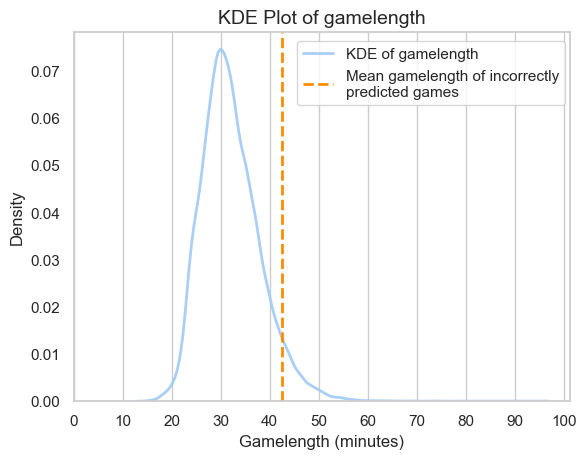

In [64]:
sns.kdeplot(tested_df["gamelength"]/60,
            linewidth=2,
            alpha=0.9,
            label="KDE of gamelength")

plt.axvline(false_pred_df["gamelength"].mean()/60,
            color='darkorange',
            linestyle='--',
            linewidth=2,
            label="Mean gamelength of incorrectly\npredicted games")

plt.xticks(range(0,101,10))
plt.grid(axis="y")

plt.title("KDE Plot of gamelength", fontsize=14)
plt.xlabel("Gamelength (minutes)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(loc=(0.45,0.8))

plt.show()

On the density plot we can see that the mean gamelength of incorrectly predicted games is notably larger than the mode of the test data

We can evaluate whether my hypothesis of predictions being less accurate for very long games by looking at the proportion of successful predictions for each percentile of test data.

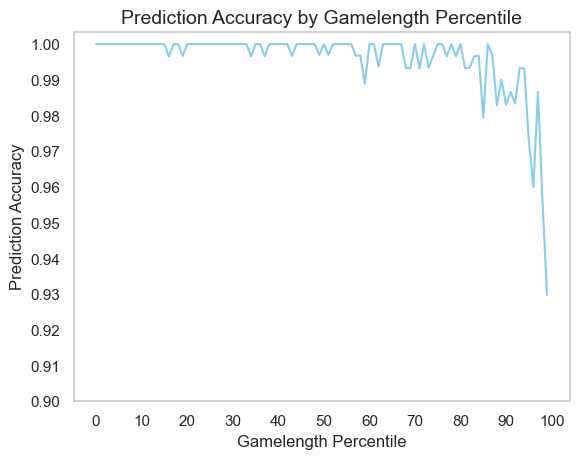

In [65]:
# Cutting the test data into 100 bins, 1 for each percentile.
tested_df["gamelength_percentile"] = pd.qcut(tested_df["gamelength"],100, labels=list(range(100)))
accuracy_per_gamelength_percentile = tested_df.groupby("gamelength_percentile")["accurate"].mean().rename("Prediction Accuracy")

plt.plot(accuracy_per_gamelength_percentile, color="skyblue")

plt.xticks(range(0,101,10))
plt.yticks(np.arange(0.90,1.01,0.01))
plt.grid()

plt.title("Prediction Accuracy by Gamelength Percentile", fontsize=14)
plt.xlabel("Gamelength Percentile", fontsize=12)
plt.ylabel("Prediction Accuracy", fontsize=12)

plt.show()

Accurate predictions are more likely in the first 50 percentiles.  Then there is only a small drop in accuracy until the 88th percentile when the prediction accuracy drops below 99% for the first time.  For the upper percentiles, there is a steep drop in prediction accuracy.

In [66]:
accuracy_per_gamelength_percentile.iloc[94:100]

gamelength_percentile
94    0.993220
95    0.972973
96    0.960000
97    0.986577
98    0.956081
99    0.929766
Name: Prediction Accuracy, dtype: float64

In [67]:
print(f"The average length of games in the 95th percentile are {tested_df['gamelength'].quantile(0.95)/60:.0f} minutes long")

print(f"The average length of games in the 99th percentile are {tested_df['gamelength'].quantile(0.99)/60:.0f} minutes long")

The average length of games in the 95th percentile are 43 minutes long
The average length of games in the 99th percentile are 49 minutes long


When we look at these percentiles more closely, we can see that the prediction accuracy of the 99th percentile is significantly lower than the rest of the data.

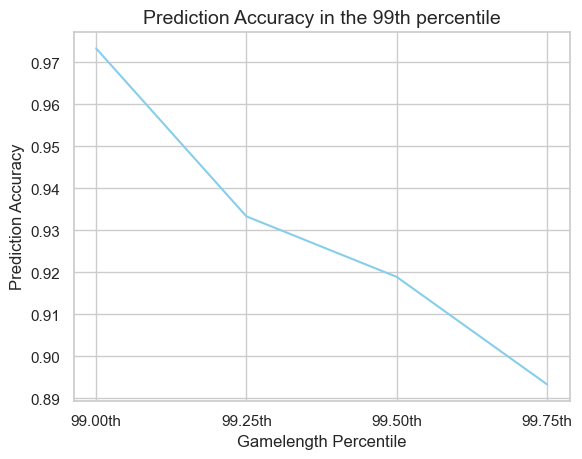

In [68]:
# Splitting the data in the 99th percentile into 4 bins.
tested_df["99_gamelength_percentile"] = pd.qcut(tested_df.loc[tested_df["gamelength_percentile"] == 99, "gamelength"], 4, labels=list(range(4)))

plt.plot(tested_df.groupby("99_gamelength_percentile")["accurate"].mean(), color="skyblue")

plt.xticks(range(0,4,1), labels=["99.00th", "99.25th", "99.50th", "99.75th"])
plt.grid(True)

plt.title("Prediction Accuracy in the 99th percentile", fontsize=14)
plt.xlabel("Gamelength Percentile", fontsize=12)
plt.ylabel("Prediction Accuracy", fontsize=12)

plt.show()

When we look closer at that 99th percentile, we can see that whilst the model is worse at predicting longer games, the curve plateaus at a 90% prediction rate.

# Conclusions
The main findings of this notebook include, but are not limited by:

- Nautilus is the most common champion and has been selected in a quarter of all games.

- Teams that select Twisted Fate win games 56.30% of the time.

- Due to game being regularly updated, certain statistics, such as vision score per minute, can vary significantly each year.

- The fortnightly changes to the game also cause significant changes in the champions that are picked.

- Teams that are on Blue side win games 53.8% of the time.

- Teams that have a majority of kills win games 95.73% of the time, and teams that have a majority of towers win games 98.38% of the time

- There appears to be a linear relationship between gold at early stages of the game and gold at later stages of the game.

- The primary predictive features all include gold and turrets.

- Those features become significantly less predictive when games become "very long" (longer than 43 minutes).

### Implications:

These results could be used by professional League of Legends teams to focus on the parts of the game most correlated with winning, and selecting and practicing champions with a higher win rate.

### Further Work

Further analysis could be done by using categorical data to find the combinations of champions with the highest win rates.

Further analysis, using statistical methods, could also be done to find whether statistics such as gold, XP, and kills have a linear, exponential, or other relationship with time.

I will further clean the data, transform the data, and create more derivative columns in my LoL_Predictions notebook.

Beyond the reshaping I have done in this notebook, I will engage in further reshaping of the dataset to include all data, of all 10 players and both teams in the same row when I use several Machine Learning models in the LoL_Predictions notebook.

In the next notebook, LoL_Elo_System, I will create an Elo System to predict games based off of the players and teams who are in the game.